# install packages

In [ ]:
''' installed pakage list '''
!pip install transformers[sentencepiece]
!conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch
!pip install glob2
!pip install tqdm
!pip install datasets
!pip install packaging -U
!pip install -U scikit-learn
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.

# File name 지정

In [132]:
season_1_file = 'paragraph_data_2022_03_23_1기.pickle'
season_2_file = 'paragraph_data_2022_03_23_2기.pickle'
total_file_name = 'paragraph_data_2022_04_06_total.csv'

# make dataset (전문인력 1기)

In [10]:
from glob import glob
from tqdm import tqdm
import numpy as np
import json
import pandas as pd
import pickle

In [2]:
def get_datas_ver1(data):
    data = data.dropna(thresh=2)
    text_list=[]
    label_list=[]
    for meta in data.iterrows():
        meta = meta[1]
        
        ''' text data 추출 '''
        text = meta[1]
        if not pd.notnull(text):
            continue
        
        ''' label data 추출 '''
        label = meta[2]
        if not pd.notnull(label):
            continue
        label = label.replace("[","").replace("]","").split(",")
        if len(label)==6:
            label = [1 if i!="0" else 0 for i in label]
        else: 
            continue
            
        text_list.append(text)
        label_list.append(label)
        
    if len(text_list) == 0 or len(label_list) == 0:
        raise Exception('data 길이가 0이거나 text labeling data')
        
    return text_list, label_list

In [3]:
def get_datas_ver2(data):
    data = data.dropna(thresh=2)
    text_list=[]
    label_list=[]
    
    ''' text, tag가 있는 index 확인 '''
    for n, c in enumerate(list(data.columns)):
        if c.find('tag') != -1 :
            tag_index=n
        elif c.find('paragraph') != -1:
            text_index=n
    
    for meta in data.iterrows():
        meta = meta[1]
        
        ''' text data 추출 '''
        text = meta[text_index]
        if not pd.notnull(text):
            continue
        
        ''' label data 추출 '''
        label = meta[tag_index]
        if not pd.notnull(label):
            continue
        label = label.replace("[","").replace("]","").split(",")
        if len(label)==6:
            label = [1 if i!="0" else 0 for i in label]
        else: 
            continue
            
        text_list.append(text)
        label_list.append(label)
        
    if len(text_list) == 0 or len(label_list) == 0:
        raise Exception('data 길이가 0이거나 text labeling data')
        
    return text_list, label_list

In [4]:
''' 전문인력 1기 데이터 추출 '''
paragraph_data_list = glob("./paragraph_labeling_1.0.0/*.xlsx")

total_text = []
total_label = []
for n, paragraph_file in enumerate(tqdm(paragraph_data_list)):
    try:
        data = pd.read_excel(paragraph_file, engine="openpyxl")
    except:
        print(n, "file has format error")
        continue
        
    try:
        try:
            text_list, label_list = get_datas_ver1(data)
        except:
            text_list, label_list = get_datas_ver2(data)

        total_text=total_text+text_list
        total_label=total_label+label_list
    except Exception as e:
        print(n, "may be text_label or Q&A file!", e)
        

  0%|▏                                                                                                                                                | 7/7222 [00:00<04:27, 27.00it/s]

0 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2 file has format error
5 file has format error


  1%|█▍                                                                                                                                              | 71/7222 [00:01<02:52, 41.44it/s]

66 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
69 file has format error
72 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


  1%|█▊                                                                                                                                              | 88/7222 [00:02<02:40, 44.31it/s]

77 file has format error


  1%|█▉                                                                                                                                             | 101/7222 [00:02<02:15, 52.64it/s]

94 file has format error
97 file has format error


  2%|███▎                                                                                                                                           | 167/7222 [00:03<02:13, 52.66it/s]

159 file has format error
166 file has format error


  3%|███▊                                                                                                                                           | 190/7222 [00:04<02:18, 50.89it/s]

183 file has format error
187 file has format error


  3%|████▏                                                                                                                                          | 212/7222 [00:04<02:26, 47.92it/s]

203 may be text_label or Q&A file! 'int' object has no attribute 'find'


  3%|████▌                                                                                                                                          | 231/7222 [00:05<02:10, 53.53it/s]

226 file has format error


  4%|█████▏                                                                                                                                         | 259/7222 [00:05<02:22, 48.84it/s]

251 file has format error
257 file has format error


  4%|█████▌                                                                                                                                         | 282/7222 [00:06<02:09, 53.47it/s]

273 file has format error
275 file has format error


  4%|██████▎                                                                                                                                        | 318/7222 [00:06<02:15, 51.00it/s]

313 file has format error
321 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


  5%|██████▉                                                                                                                                        | 348/7222 [00:07<02:11, 52.43it/s]

340 file has format error
347 file has format error


  5%|███████▍                                                                                                                                       | 373/7222 [00:07<02:15, 50.42it/s]

363 file has format error
368 file has format error


  6%|████████▏                                                                                                                                      | 416/7222 [00:08<02:29, 45.60it/s]

408 file has format error


  6%|████████▊                                                                                                                                      | 442/7222 [00:09<02:41, 41.92it/s]

435 file has format error
442 file has format error
443 file has format error


  6%|█████████▏                                                                                                                                     | 464/7222 [00:10<02:35, 43.50it/s]

458 file has format error
462 file has format error


  7%|██████████▋                                                                                                                                    | 540/7222 [00:15<09:23, 11.86it/s]

533 file has format error


  8%|███████████▎                                                                                                                                   | 570/7222 [00:15<03:12, 34.61it/s]

560 may be text_label or Q&A file! 'int' object has no attribute 'find'
570 file has format error


  8%|███████████▌                                                                                                                                   | 582/7222 [00:16<02:35, 42.63it/s]

574 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment
576 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


  8%|███████████▉                                                                                                                                   | 603/7222 [00:16<02:46, 39.70it/s]

598 file has format error
601 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


  9%|████████████▏                                                                                                                                  | 614/7222 [00:16<02:30, 43.83it/s]

605 file has format error


  9%|████████████▍                                                                                                                                  | 631/7222 [00:17<02:15, 48.53it/s]

621 file has format error
622 file has format error
627 file has format error


  9%|████████████▋                                                                                                                                  | 643/7222 [00:17<02:16, 48.31it/s]

635 file has format error


  9%|█████████████▎                                                                                                                                 | 670/7222 [00:17<02:12, 49.34it/s]

661 file has format error


 10%|█████████████▊                                                                                                                                 | 697/7222 [00:18<02:10, 50.05it/s]

687 file has format error
694 file has format error


 10%|██████████████▏                                                                                                                                | 719/7222 [00:18<02:08, 50.70it/s]

711 file has format error
715 file has format error


 10%|██████████████▍                                                                                                                                | 730/7222 [00:19<02:11, 49.27it/s]

723 file has format error


 10%|███████████████                                                                                                                                | 758/7222 [00:19<02:15, 47.83it/s]

752 file has format error


 11%|███████████████▎                                                                                                                               | 773/7222 [00:20<02:18, 46.56it/s]

767 file has format error


 11%|███████████████▋                                                                                                                               | 790/7222 [00:20<02:05, 51.24it/s]

779 file has format error
785 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment
786 file has format error
786 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 11%|████████████████                                                                                                                               | 809/7222 [00:20<02:01, 52.68it/s]

801 file has format error
805 file has format error


 11%|████████████████▎                                                                                                                              | 821/7222 [00:21<02:08, 49.79it/s]

813 file has format error


 12%|████████████████▋                                                                                                                              | 843/7222 [00:21<02:03, 51.67it/s]

837 file has format error


 12%|█████████████████▏                                                                                                                             | 870/7222 [00:22<02:09, 48.96it/s]

864 file has format error
870 file has format error


 12%|█████████████████▋                                                                                                                             | 892/7222 [00:22<02:55, 36.08it/s]

884 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
888 file has format error
894 file has format error


 13%|██████████████████                                                                                                                             | 914/7222 [00:23<02:22, 44.29it/s]

906 file has format error


 13%|██████████████████▌                                                                                                                            | 935/7222 [00:23<02:16, 46.18it/s]

926 file has format error


 13%|███████████████████                                                                                                                            | 962/7222 [00:24<02:05, 50.04it/s]

953 file has format error
960 file has format error


 14%|███████████████████▌                                                                                                                           | 985/7222 [00:24<02:01, 51.38it/s]

976 file has format error
980 file has format error


 14%|████████████████████                                                                                                                          | 1022/7222 [00:25<02:24, 42.92it/s]

1014 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 15%|█████████████████████▏                                                                                                                        | 1077/7222 [00:26<02:51, 35.90it/s]

1072 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 15%|█████████████████████▉                                                                                                                        | 1114/7222 [00:27<02:09, 47.05it/s]

1107 file has format error
1114 file has format error


 16%|██████████████████████▍                                                                                                                       | 1141/7222 [00:28<02:02, 49.45it/s]

1130 file has format error
1135 file has format error


 16%|██████████████████████▋                                                                                                                       | 1151/7222 [00:28<02:44, 36.80it/s]

1145 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 16%|███████████████████████                                                                                                                       | 1172/7222 [00:29<02:07, 47.50it/s]

1166 file has format error
1171 file has format error


 16%|███████████████████████▏                                                                                                                      | 1182/7222 [00:29<02:45, 36.51it/s]

1176 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 17%|███████████████████████▊                                                                                                                      | 1209/7222 [00:29<02:08, 46.89it/s]

1199 file has format error
1205 file has format error


 17%|████████████████████████▏                                                                                                                     | 1231/7222 [00:30<02:00, 49.79it/s]

1220 file has format error
1225 file has format error


 18%|████████████████████████▊                                                                                                                     | 1265/7222 [00:31<01:55, 51.61it/s]

1259 file has format error


 18%|█████████████████████████▌                                                                                                                    | 1297/7222 [00:31<02:07, 46.41it/s]

1287 file has format error
1294 file has format error


 18%|█████████████████████████▉                                                                                                                    | 1317/7222 [00:32<02:07, 46.29it/s]

1312 file has format error


 19%|██████████████████████████▌                                                                                                                   | 1349/7222 [00:32<01:55, 50.70it/s]

1343 file has format error


 19%|███████████████████████████▏                                                                                                                  | 1382/7222 [00:33<01:59, 48.75it/s]

1372 file has format error
1379 file has format error


 19%|███████████████████████████▍                                                                                                                  | 1397/7222 [00:34<02:28, 39.19it/s]

1394 file has format error
1396 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
1399 file has format error


 20%|███████████████████████████▊                                                                                                                  | 1414/7222 [00:34<02:08, 45.18it/s]

1412 file has format error


 20%|████████████████████████████▏                                                                                                                 | 1435/7222 [00:34<02:11, 43.92it/s]

1429 file has format error


 20%|████████████████████████████▌                                                                                                                 | 1450/7222 [00:35<02:09, 44.56it/s]

1440 may be text_label or Q&A file! 'int' object has no attribute 'find'


 20%|████████████████████████████▋                                                                                                                 | 1461/7222 [00:35<01:57, 49.12it/s]

1455 file has format error
1460 file has format error


 21%|█████████████████████████████▏                                                                                                                | 1483/7222 [00:35<01:57, 48.74it/s]

1475 file has format error
1479 file has format error


 21%|█████████████████████████████▍                                                                                                                | 1498/7222 [00:36<02:03, 46.24it/s]

1493 file has format error


 22%|██████████████████████████████▋                                                                                                               | 1562/7222 [00:37<02:46, 33.95it/s]

1555 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 22%|███████████████████████████████▏                                                                                                              | 1588/7222 [00:38<02:03, 45.75it/s]

1582 file has format error


 22%|███████████████████████████████▊                                                                                                              | 1618/7222 [00:39<02:00, 46.67it/s]

1610 file has format error
1617 file has format error


 23%|████████████████████████████████▏                                                                                                             | 1639/7222 [00:39<01:59, 46.84it/s]

1631 file has format error


 23%|████████████████████████████████▉                                                                                                             | 1676/7222 [00:40<01:53, 48.66it/s]

1668 file has format error


 24%|█████████████████████████████████▍                                                                                                            | 1703/7222 [00:40<01:54, 48.06it/s]

1694 file has format error
1701 file has format error


 24%|█████████████████████████████████▉                                                                                                            | 1723/7222 [00:41<02:02, 44.84it/s]

1718 file has format error


 24%|██████████████████████████████████▋                                                                                                           | 1763/7222 [00:42<01:59, 45.71it/s]

1755 file has format error


 25%|██████████████████████████████████▉                                                                                                           | 1779/7222 [00:42<01:56, 46.55it/s]

1769 file has format error


 25%|███████████████████████████████████                                                                                                           | 1785/7222 [00:42<01:53, 47.70it/s]

1779 file has format error
1785 file has format error


 25%|███████████████████████████████████▌                                                                                                          | 1807/7222 [00:43<01:46, 50.81it/s]

1800 file has format error


 25%|████████████████████████████████████▏                                                                                                         | 1838/7222 [00:43<02:01, 44.19it/s]

1831 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 26%|█████████████████████████████████████▏                                                                                                        | 1893/7222 [00:45<02:22, 37.47it/s]

1884 file has format error


 26%|█████████████████████████████████████▍                                                                                                        | 1903/7222 [00:46<03:10, 27.96it/s]

1893 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 27%|█████████████████████████████████████▉                                                                                                        | 1928/7222 [00:46<02:14, 39.43it/s]

1923 file has format error


 27%|██████████████████████████████████████▎                                                                                                       | 1949/7222 [00:47<02:32, 34.61it/s]

1944 file has format error
1949 file has format error


 27%|██████████████████████████████████████▋                                                                                                       | 1969/7222 [00:48<03:43, 23.50it/s]

1961 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 28%|███████████████████████████████████████▏                                                                                                      | 1995/7222 [00:48<02:12, 39.52it/s]

1990 file has format error


 28%|███████████████████████████████████████▋                                                                                                      | 2016/7222 [00:49<01:52, 46.32it/s]

2008 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 28%|████████████████████████████████████████                                                                                                      | 2037/7222 [00:49<01:47, 48.08it/s]

2029 file has format error


 28%|████████████████████████████████████████▍                                                                                                     | 2058/7222 [00:50<01:49, 46.96it/s]

2049 file has format error
2054 file has format error


 29%|█████████████████████████████████████████▎                                                                                                    | 2099/7222 [00:51<02:05, 40.87it/s]

2094 file has format error


 30%|██████████████████████████████████████████                                                                                                    | 2140/7222 [00:52<01:51, 45.38it/s]

2134 file has format error


 30%|██████████████████████████████████████████▍                                                                                                   | 2160/7222 [00:52<02:03, 40.96it/s]

2155 file has format error
2161 file has format error


 31%|███████████████████████████████████████████▎                                                                                                  | 2205/7222 [00:53<01:56, 43.02it/s]

2199 file has format error


 31%|████████████████████████████████████████████                                                                                                  | 2241/7222 [00:54<01:52, 44.32it/s]

2236 file has format error


 31%|████████████████████████████████████████████▍                                                                                                 | 2261/7222 [00:55<01:57, 42.06it/s]

2255 file has format error
2261 file has format error


 32%|█████████████████████████████████████████████                                                                                                 | 2292/7222 [00:55<02:16, 36.14it/s]

2284 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 32%|█████████████████████████████████████████████▎                                                                                                | 2307/7222 [00:56<01:58, 41.55it/s]

2303 file has format error


 32%|█████████████████████████████████████████████▋                                                                                                | 2323/7222 [00:56<01:50, 44.48it/s]

2315 file has format error


 33%|██████████████████████████████████████████████▏                                                                                               | 2349/7222 [00:57<01:46, 45.58it/s]

2340 file has format error


 33%|██████████████████████████████████████████████▍                                                                                               | 2364/7222 [00:57<01:47, 44.98it/s]

2359 file has format error
2365 file has format error


 33%|██████████████████████████████████████████████▋                                                                                               | 2374/7222 [00:57<01:49, 44.26it/s]

2369 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 33%|███████████████████████████████████████████████▍                                                                                              | 2414/7222 [00:58<01:57, 41.07it/s]

2405 file has format error
2406 file has format error


 34%|███████████████████████████████████████████████▋                                                                                              | 2424/7222 [00:58<01:51, 43.13it/s]

2416 file has format error


 34%|████████████████████████████████████████████████▏                                                                                             | 2449/7222 [00:59<02:06, 37.80it/s]

2445 file has format error


 34%|████████████████████████████████████████████████▌                                                                                             | 2470/7222 [01:00<01:53, 41.96it/s]

2463 file has format error
2470 file has format error


 35%|█████████████████████████████████████████████████▌                                                                                            | 2519/7222 [01:01<03:02, 25.81it/s]

2512 file has format error


 35%|█████████████████████████████████████████████████▊                                                                                            | 2533/7222 [01:01<02:31, 31.03it/s]

2525 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 35%|██████████████████████████████████████████████████▎                                                                                           | 2556/7222 [01:02<02:02, 38.01it/s]

2550 file has format error


 36%|██████████████████████████████████████████████████▍                                                                                           | 2566/7222 [01:02<01:56, 40.01it/s]

2562 file has format error
2568 file has format error


 36%|██████████████████████████████████████████████████▋                                                                                           | 2581/7222 [01:03<01:49, 42.41it/s]

2574 file has format error


 36%|███████████████████████████████████████████████████▏                                                                                          | 2601/7222 [01:03<02:12, 34.84it/s]

2596 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 36%|███████████████████████████████████████████████████▌                                                                                          | 2622/7222 [01:04<01:58, 38.77it/s]

2615 file has format error


 37%|████████████████████████████████████████████████████▎                                                                                         | 2659/7222 [01:05<01:49, 41.83it/s]

2650 file has format error


 37%|████████████████████████████████████████████████████▌                                                                                         | 2675/7222 [01:05<01:48, 41.94it/s]

2669 file has format error
2675 file has format error


 38%|█████████████████████████████████████████████████████▍                                                                                        | 2717/7222 [01:06<02:24, 31.21it/s]

2712 file has format error
2715 file has format error


 38%|█████████████████████████████████████████████████████▌                                                                                        | 2726/7222 [01:07<03:16, 22.87it/s]

2719 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 38%|█████████████████████████████████████████████████████▊                                                                                        | 2739/7222 [01:07<02:22, 31.54it/s]

2731 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 38%|██████████████████████████████████████████████████████▎                                                                                       | 2763/7222 [01:08<02:31, 29.51it/s]

2756 file has format error


 38%|██████████████████████████████████████████████████████▌                                                                                       | 2778/7222 [01:09<02:39, 27.83it/s]

2773 file has format error


 39%|██████████████████████████████████████████████████████▊                                                                                       | 2786/7222 [01:09<02:28, 29.90it/s]

2780 file has format error


 39%|███████████████████████████████████████████████████████▍                                                                                      | 2821/7222 [01:10<02:03, 35.70it/s]

2817 file has format error


 39%|███████████████████████████████████████████████████████▋                                                                                      | 2833/7222 [01:11<02:58, 24.60it/s]

2828 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 40%|████████████████████████████████████████████████████████▏                                                                                     | 2857/7222 [01:11<02:24, 30.20it/s]

2852 file has format error


 40%|████████████████████████████████████████████████████████▍                                                                                     | 2873/7222 [01:12<02:16, 31.75it/s]

2869 file has format error


 40%|████████████████████████████████████████████████████████▋                                                                                     | 2881/7222 [01:12<02:33, 28.30it/s]

2876 file has format error


 40%|████████████████████████████████████████████████████████▉                                                                                     | 2896/7222 [01:13<04:59, 14.44it/s]

2893 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 40%|█████████████████████████████████████████████████████████▍                                                                                    | 2921/7222 [01:14<02:22, 30.23it/s]

2916 file has format error


 41%|██████████████████████████████████████████████████████████▏                                                                                   | 2958/7222 [01:16<06:05, 11.68it/s]

2950 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
2953 file has format error


 41%|██████████████████████████████████████████████████████████▎                                                                                   | 2963/7222 [01:16<04:55, 14.43it/s]

2958 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 41%|██████████████████████████████████████████████████████████▌                                                                                   | 2980/7222 [01:17<02:41, 26.22it/s]

2973 file has format error
2979 file has format error


 42%|███████████████████████████████████████████████████████████▍                                                                                  | 3025/7222 [01:18<01:53, 37.05it/s]

3018 file has format error


 42%|████████████████████████████████████████████████████████████▏                                                                                 | 3062/7222 [01:19<01:56, 35.78it/s]

3055 file has format error


 43%|████████████████████████████████████████████████████████████▌                                                                                 | 3078/7222 [01:20<02:18, 29.91it/s]

3074 file has format error


 43%|████████████████████████████████████████████████████████████▋                                                                                 | 3085/7222 [01:20<02:27, 28.00it/s]

3080 file has format error


 43%|████████████████████████████████████████████████████████████▊                                                                                 | 3092/7222 [01:20<02:57, 23.25it/s]

3085 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 43%|█████████████████████████████████████████████████████████████▍                                                                                | 3126/7222 [01:22<02:20, 29.08it/s]

3121 file has format error


 43%|█████████████████████████████████████████████████████████████▌                                                                                | 3130/7222 [01:22<02:13, 30.73it/s]/home/rnwnsgud1234/0.File/anaconda3/lib/python3.9/site-packages/openpyxl/reader/workbook.py:88: UserWarning: File contains an invalid specification for paragraph_labeling. This will be removed
  warn(msg)
 43%|█████████████████████████████████████████████████████████████▋                                                                                | 3138/7222 [01:22<02:12, 30.91it/s]

3133 file has format error


 44%|██████████████████████████████████████████████████████████████▏                                                                               | 3162/7222 [01:23<01:58, 34.20it/s]

3155 file has format error


 44%|██████████████████████████████████████████████████████████████▍                                                                               | 3178/7222 [01:23<02:00, 33.65it/s]

3172 file has format error
3178 file has format error


 45%|███████████████████████████████████████████████████████████████▎                                                                              | 3222/7222 [01:24<01:59, 33.37it/s]

3218 file has format error


 45%|████████████████████████████████████████████████████████████████                                                                              | 3258/7222 [01:26<02:00, 32.93it/s]

3251 file has format error
3256 file has format error


 45%|████████████████████████████████████████████████████████████████▍                                                                             | 3278/7222 [01:26<02:03, 32.03it/s]

3272 file has format error
3278 file has format error


 46%|████████████████████████████████████████████████████████████████▉                                                                             | 3302/7222 [01:27<02:12, 29.53it/s]

3297 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 46%|█████████████████████████████████████████████████████████████████▎                                                                            | 3322/7222 [01:28<02:01, 32.22it/s]

3317 file has format error


 46%|█████████████████████████████████████████████████████████████████▊                                                                            | 3346/7222 [01:28<02:00, 32.20it/s]

3340 file has format error


 46%|██████████████████████████████████████████████████████████████████                                                                            | 3358/7222 [01:29<01:58, 32.61it/s]

3354 file has format error


 47%|██████████████████████████████████████████████████████████████████▎                                                                           | 3375/7222 [01:29<01:52, 34.10it/s]

3371 file has format error


 47%|██████████████████████████████████████████████████████████████████▌                                                                           | 3383/7222 [01:30<01:57, 32.75it/s]

3378 file has format error


 47%|███████████████████████████████████████████████████████████████████▎                                                                          | 3422/7222 [01:31<02:08, 29.53it/s]

3417 file has format error


 48%|████████████████████████████████████████████████████████████████████                                                                          | 3462/7222 [01:32<01:59, 31.46it/s]

3457 file has format error


 48%|████████████████████████████████████████████████████████████████████▍                                                                         | 3482/7222 [01:33<02:06, 29.53it/s]

3475 file has format error


 48%|████████████████████████████████████████████████████████████████████▌                                                                         | 3486/7222 [01:33<02:18, 26.97it/s]

3482 file has format error


 48%|████████████████████████████████████████████████████████████████████▋                                                                         | 3492/7222 [01:33<03:02, 20.49it/s]

3490 file has format error


 49%|█████████████████████████████████████████████████████████████████████▎                                                                        | 3525/7222 [01:35<02:16, 27.18it/s]

3521 file has format error


 49%|█████████████████████████████████████████████████████████████████████▉                                                                        | 3559/7222 [01:36<02:26, 24.93it/s]

3555 file has format error


 50%|██████████████████████████████████████████████████████████████████████▎                                                                       | 3579/7222 [01:37<01:58, 30.65it/s]

3573 file has format error


 50%|██████████████████████████████████████████████████████████████████████▍                                                                       | 3583/7222 [01:37<02:00, 30.23it/s]

3580 file has format error


 50%|███████████████████████████████████████████████████████████████████████▎                                                                      | 3624/7222 [01:38<01:54, 31.37it/s]

3619 file has format error


 50%|███████████████████████████████████████████████████████████████████████▍                                                                      | 3636/7222 [01:39<01:54, 31.25it/s]

3631 file has format error
3636 file has format error


 51%|███████████████████████████████████████████████████████████████████████▉                                                                      | 3660/7222 [01:39<01:52, 31.66it/s]

3656 file has format error


 51%|████████████████████████████████████████████████████████████████████████▎                                                                     | 3680/7222 [01:40<01:47, 33.01it/s]

3674 file has format error
3680 file has format error


 52%|█████████████████████████████████████████████████████████████████████████▏                                                                    | 3722/7222 [01:42<01:59, 29.24it/s]

3719 file has format error


 52%|█████████████████████████████████████████████████████████████████████████▍                                                                    | 3736/7222 [01:42<02:12, 26.38it/s]

3731 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
3732 file has format error
3732 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 52%|█████████████████████████████████████████████████████████████████████████▉                                                                    | 3759/7222 [01:43<01:57, 29.59it/s]

3753 file has format error


 52%|██████████████████████████████████████████████████████████████████████████▏                                                                   | 3775/7222 [01:43<01:57, 29.31it/s]

3769 file has format error
3775 file has format error


 52%|██████████████████████████████████████████████████████████████████████████▎                                                                   | 3779/7222 [01:44<01:55, 29.89it/s]

3777 file has format error


 53%|███████████████████████████████████████████████████████████████████████████▏                                                                  | 3821/7222 [01:45<02:03, 27.59it/s]

3815 file has format error


 53%|███████████████████████████████████████████████████████████████████████████▎                                                                  | 3831/7222 [01:46<01:56, 29.18it/s]

3827 file has format error


 53%|███████████████████████████████████████████████████████████████████████████▋                                                                  | 3849/7222 [01:46<01:48, 31.00it/s]

3848 file has format error


 54%|████████████████████████████████████████████████████████████████████████████                                                                  | 3869/7222 [01:47<01:54, 29.30it/s]

3867 file has format error


 54%|████████████████████████████████████████████████████████████████████████████▏                                                                 | 3873/7222 [01:47<01:52, 29.90it/s]

3873 file has format error
3875 file has format error


 54%|████████████████████████████████████████████████████████████████████████████▉                                                                 | 3916/7222 [01:49<01:54, 28.94it/s]

3912 file has format error


 54%|█████████████████████████████████████████████████████████████████████████████▏                                                                | 3925/7222 [01:49<02:47, 19.72it/s]

3923 file has format error


 55%|█████████████████████████████████████████████████████████████████████████████▋                                                                | 3949/7222 [01:50<01:56, 28.06it/s]

3946 file has format error


 55%|██████████████████████████████████████████████████████████████████████████████                                                                | 3970/7222 [01:51<01:48, 29.93it/s]

3965 file has format error


 55%|██████████████████████████████████████████████████████████████████████████████▏                                                               | 3977/7222 [01:51<02:03, 26.32it/s]

3971 file has format error
3973 file has format error


 56%|██████████████████████████████████████████████████████████████████████████████▊                                                               | 4011/7222 [01:53<01:59, 26.96it/s]

4008 file has format error


 56%|███████████████████████████████████████████████████████████████████████████████                                                               | 4024/7222 [01:53<01:51, 28.56it/s]

4018 file has format error


 56%|███████████████████████████████████████████████████████████████████████████████▌                                                              | 4044/7222 [01:54<01:52, 28.17it/s]

4041 file has format error


 56%|███████████████████████████████████████████████████████████████████████████████▊                                                              | 4061/7222 [01:54<01:58, 26.57it/s]

4054 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
4060 file has format error


 56%|████████████████████████████████████████████████████████████████████████████████                                                              | 4070/7222 [01:55<01:51, 28.28it/s]

4066 file has format error
4069 file has format error


 57%|████████████████████████████████████████████████████████████████████████████████▊                                                             | 4109/7222 [01:56<01:55, 26.99it/s]

4106 file has format error


 57%|█████████████████████████████████████████████████████████████████████████████████                                                             | 4122/7222 [01:57<01:56, 26.64it/s]

4118 file has format error


 57%|█████████████████████████████████████████████████████████████████████████████████▌                                                            | 4147/7222 [01:58<01:54, 26.94it/s]

4141 file has format error


 58%|█████████████████████████████████████████████████████████████████████████████████▋                                                            | 4157/7222 [01:58<01:41, 30.23it/s]

4155 file has format error


 58%|█████████████████████████████████████████████████████████████████████████████████▉                                                            | 4168/7222 [01:59<01:57, 26.02it/s]

4163 file has format error
4165 file has format error


 58%|██████████████████████████████████████████████████████████████████████████████████▏                                                           | 4177/7222 [01:59<01:53, 26.75it/s]

4172 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 58%|██████████████████████████████████████████████████████████████████████████████████▍                                                           | 4193/7222 [02:00<02:40, 18.93it/s]

4187 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 58%|██████████████████████████████████████████████████████████████████████████████████▋                                                           | 4208/7222 [02:00<02:01, 24.75it/s]

4202 file has format error


 58%|██████████████████████████████████████████████████████████████████████████████████▉                                                           | 4215/7222 [02:01<01:52, 26.70it/s]

4212 file has format error


 59%|███████████████████████████████████████████████████████████████████████████████████▎                                                          | 4236/7222 [02:01<01:54, 26.11it/s]

4231 file has format error


 59%|███████████████████████████████████████████████████████████████████████████████████▍                                                          | 4242/7222 [02:02<03:10, 15.65it/s]

4237 file has format error


 59%|███████████████████████████████████████████████████████████████████████████████████▋                                                          | 4254/7222 [02:02<02:04, 23.87it/s]

4251 file has format error


 59%|███████████████████████████████████████████████████████████████████████████████████▊                                                          | 4261/7222 [02:03<02:00, 24.54it/s]

4257 file has format error
4259 file has format error


 60%|████████████████████████████████████████████████████████████████████████████████████▌                                                         | 4301/7222 [02:04<01:51, 26.14it/s]

4298 file has format error


 60%|████████████████████████████████████████████████████████████████████████████████████▊                                                         | 4314/7222 [02:05<01:45, 27.67it/s]

4308 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment
4311 file has format error


 60%|█████████████████████████████████████████████████████████████████████████████████████▏                                                        | 4330/7222 [02:06<01:54, 25.31it/s]

4327 file has format error


 60%|█████████████████████████████████████████████████████████████████████████████████████▎                                                        | 4337/7222 [02:06<01:48, 26.68it/s]

4334 file has format error


 60%|█████████████████████████████████████████████████████████████████████████████████████▌                                                        | 4354/7222 [02:07<01:39, 28.94it/s]

4351 file has format error


 60%|█████████████████████████████████████████████████████████████████████████████████████▊                                                        | 4364/7222 [02:07<01:44, 27.39it/s]

4358 file has format error


 61%|██████████████████████████████████████████████████████████████████████████████████████▌                                                       | 4402/7222 [02:09<01:51, 25.30it/s]

4397 file has format error


 61%|██████████████████████████████████████████████████████████████████████████████████████▋                                                       | 4409/7222 [02:09<01:46, 26.51it/s]

4407 file has format error


 61%|███████████████████████████████████████████████████████████████████████████████████████                                                       | 4428/7222 [02:10<01:43, 27.08it/s]

4425 file has format error


 61%|███████████████████████████████████████████████████████████████████████████████████████▏                                                      | 4434/7222 [02:10<01:42, 27.21it/s]

4431 file has format error


 62%|███████████████████████████████████████████████████████████████████████████████████████▌                                                      | 4452/7222 [02:11<01:52, 24.52it/s]

4449 file has format error


 62%|███████████████████████████████████████████████████████████████████████████████████████▋                                                      | 4462/7222 [02:11<01:42, 26.99it/s]

4457 file has format error


 62%|███████████████████████████████████████████████████████████████████████████████████████▉                                                      | 4471/7222 [02:12<01:54, 23.98it/s]

4470 may be text_label or Q&A file! 'int' object has no attribute 'find'


 62%|████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 4507/7222 [02:13<01:38, 27.49it/s]

4501 file has format error


 63%|████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 4514/7222 [02:13<01:31, 29.59it/s]

4510 file has format error


 63%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 4538/7222 [02:14<01:25, 31.54it/s]

4531 file has format error
4532 file has format error


 63%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 4554/7222 [02:15<01:26, 30.96it/s]

4548 file has format error


 63%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 4558/7222 [02:15<01:24, 31.49it/s]

4555 file has format error


 64%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 4599/7222 [02:16<01:29, 29.18it/s]

4593 file has format error


 64%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 4606/7222 [02:17<01:26, 30.34it/s]

4603 file has format error


 64%|███████████████████████████████████████████████████████████████████████████████████████████                                                   | 4630/7222 [02:17<01:28, 29.35it/s]

4626 file has format error


 64%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 4648/7222 [02:18<01:40, 25.68it/s]

4642 file has format error


 64%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 4654/7222 [02:18<01:41, 25.40it/s]

4649 file has format error


 65%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 4688/7222 [02:20<01:33, 27.04it/s]

4686 file has format error


 65%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 4695/7222 [02:20<01:48, 23.38it/s]

4688 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 65%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 4701/7222 [02:20<01:44, 24.07it/s]

4698 file has format error


 65%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 4727/7222 [02:21<01:28, 28.17it/s]

4722 file has format error


 66%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 4742/7222 [02:22<01:46, 23.22it/s]

4738 file has format error


 66%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 4748/7222 [02:22<01:45, 23.35it/s]

4745 file has format error


 66%|██████████████████████████████████████████████████████████████████████████████████████████████                                                | 4787/7222 [02:24<01:40, 24.30it/s]

4783 file has format error


 66%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 4797/7222 [02:24<01:30, 26.67it/s]

4793 file has format error


 67%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 4815/7222 [02:25<01:39, 24.29it/s]

4815 file has format error


 67%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 4838/7222 [02:27<02:08, 18.59it/s]

4833 file has format error


 67%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 4853/7222 [02:27<01:45, 22.53it/s]

4849 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 68%|████████████████████████████████████████████████████████████████████████████████████████████████                                              | 4883/7222 [02:29<01:35, 24.39it/s]

4879 file has format error


 68%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 4892/7222 [02:29<01:30, 25.70it/s]

4888 file has format error


 68%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 4914/7222 [02:30<01:36, 23.99it/s]

4911 file has format error


 68%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 4932/7222 [02:31<01:30, 25.42it/s]

4927 file has format error


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████                                             | 4939/7222 [02:31<01:35, 24.00it/s]

4933 file has format error


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 4958/7222 [02:32<01:26, 26.08it/s]

4955 file has format error
4959 file has format error


/home/rnwnsgud1234/0.File/anaconda3/lib/python3.9/site-packages/openpyxl/reader/workbook.py:88: UserWarning: File contains an invalid specification for text_labeling (1). This will be removed
  warn(msg)
 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 4977/7222 [02:33<01:34, 23.84it/s]

4972 file has format error


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████                                            | 4986/7222 [02:33<01:29, 24.90it/s]

4981 file has format error


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 5010/7222 [02:34<01:30, 24.45it/s]

5006 file has format error


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5029/7222 [02:35<01:34, 23.19it/s]

5024 file has format error


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 5035/7222 [02:35<01:35, 22.84it/s]

5030 file has format error


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 5045/7222 [02:36<01:29, 24.41it/s]

5041 file has format error


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 5064/7222 [02:38<03:39,  9.84it/s]

5064 file has format error


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 5075/7222 [02:39<02:52, 12.44it/s]

5072 file has format error


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 5097/7222 [02:40<01:25, 24.87it/s]

5094 file has format error


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 5118/7222 [02:41<01:28, 23.74it/s]

5113 file has format error


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 5125/7222 [02:41<01:13, 28.65it/s]

5119 file has format error
5121 file has format error
5122 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 5163/7222 [02:42<01:16, 26.87it/s]

5158 file has format error


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 5173/7222 [02:43<01:14, 27.52it/s]

5168 file has format error


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 5195/7222 [02:44<01:35, 21.29it/s]

5191 file has format error


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 5214/7222 [02:45<01:25, 23.46it/s]

5210 file has format error
5215 file has format error


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 5258/7222 [02:46<01:17, 25.38it/s]

5252 file has format error


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 5268/7222 [02:47<02:26, 13.30it/s]

5262 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
5264 file has format error
5265 file has format error


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 5292/7222 [02:48<01:18, 24.49it/s]

5288 file has format error


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 5312/7222 [02:49<01:07, 28.48it/s]

5306 file has format error


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 5319/7222 [02:49<01:08, 27.58it/s]

5313 file has format error


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 5326/7222 [02:49<01:08, 27.71it/s]

5321 file has format error


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 5363/7222 [02:51<01:09, 26.72it/s]

5358 file has format error


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 5370/7222 [02:51<01:04, 28.50it/s]

5366 file has format error


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 5385/7222 [02:52<01:32, 19.78it/s]

5380 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 5394/7222 [02:52<01:21, 22.48it/s]

5390 file has format error


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 5409/7222 [02:53<01:07, 26.80it/s]

5404 file has format error
5409 file has format error


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 5419/7222 [02:53<01:04, 27.84it/s]

5416 file has format error


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 5447/7222 [02:54<01:07, 26.12it/s]

5443 file has format error


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 5454/7222 [02:54<01:05, 26.98it/s]

5451 file has format error
5454 may be text_label or Q&A file! 'int' object has no attribute 'find'


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 5479/7222 [02:55<01:03, 27.56it/s]

5473 file has format error


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 5491/7222 [02:56<01:27, 19.76it/s]

5487 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment
5490 file has format error


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 5499/7222 [02:57<01:47, 16.01it/s]

5496 file has format error


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 5505/7222 [02:57<02:25, 11.84it/s]

5502 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 5526/7222 [02:58<01:14, 22.89it/s]

5524 file has format error


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 5538/7222 [02:59<01:06, 25.33it/s]

5534 file has format error


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 5559/7222 [02:59<01:07, 24.69it/s]

5555 file has format error


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 5578/7222 [03:00<01:03, 25.76it/s]

5573 file has format error


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 5584/7222 [03:00<01:01, 26.70it/s]

5579 file has format error


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 5617/7222 [03:02<01:03, 25.35it/s]

5612 file has format error


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 5624/7222 [03:02<00:59, 27.02it/s]

5620 file has format error


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 5642/7222 [03:03<01:20, 19.69it/s]

5638 file has format error
5642 file has format error


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 5660/7222 [03:04<01:15, 20.65it/s]

5654 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
5660 file has format error


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 5690/7222 [03:05<01:02, 24.40it/s]

5686 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 5702/7222 [03:05<01:04, 23.47it/s]

5701 file has format error


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 5708/7222 [03:06<01:18, 19.23it/s]

5704 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
5709 file has format error


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 5721/7222 [03:07<01:35, 15.64it/s]

5716 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 5736/7222 [03:08<01:53, 13.05it/s]

5732 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
5734 file has format error


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 5760/7222 [03:09<01:05, 22.19it/s]

5757 file has format error


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 5772/7222 [03:10<01:00, 24.06it/s]

5769 file has format error


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 5796/7222 [03:10<00:56, 25.11it/s]

5792 file has format error


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 5806/7222 [03:11<00:55, 25.48it/s]

5802 file has format error


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 5827/7222 [03:12<00:56, 24.72it/s]

5824 file has format error


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 5851/7222 [03:13<00:55, 24.89it/s]

5847 file has format error


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 5882/7222 [03:14<00:51, 26.26it/s]

5876 file has format error
5881 file has format error


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 5888/7222 [03:14<01:00, 22.01it/s]

5883 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 5895/7222 [03:15<00:54, 24.31it/s]

5890 file has format error


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 5902/7222 [03:15<00:59, 22.22it/s]

5897 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
5900 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 5917/7222 [03:16<00:58, 22.17it/s]

5916 file has format error


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 5929/7222 [03:17<01:13, 17.61it/s]

5925 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 5944/7222 [03:17<00:54, 23.36it/s]

5939 file has format error


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 5965/7222 [03:18<00:50, 24.66it/s]

5960 file has format error


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 5977/7222 [03:19<00:55, 22.24it/s]

5973 file has format error


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 5986/7222 [03:19<00:51, 24.16it/s]

5982 file has format error


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6007/7222 [03:20<00:52, 23.35it/s]

6002 file has format error


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 6031/7222 [03:21<00:46, 25.35it/s]

6027 file has format error


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 6061/7222 [03:22<00:45, 25.75it/s]

6058 file has format error


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 6073/7222 [03:23<00:46, 24.96it/s]

6068 file has format error


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 6094/7222 [03:23<00:47, 23.68it/s]

6090 file has format error
6091 file has format error


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6140/7222 [03:25<00:43, 24.88it/s]

6135 file has format error


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 6149/7222 [03:26<00:41, 25.88it/s]

6144 file has format error
6147 file has format error


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 6158/7222 [03:26<00:42, 25.14it/s]

6153 file has format error


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 6164/7222 [03:27<00:58, 18.23it/s]

6162 file has format error


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 6231/7222 [03:29<00:39, 25.27it/s]

6227 file has format error


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 6237/7222 [03:30<00:38, 25.89it/s]

6233 file has format error
6234 file has format error


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 6244/7222 [03:30<00:51, 19.00it/s]

6238 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
6242 file has format error


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 6256/7222 [03:31<00:42, 22.59it/s]

6251 file has format error


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 6271/7222 [03:31<00:38, 24.40it/s]

6266 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 6286/7222 [03:32<00:39, 23.97it/s]

6282 may be text_label or Q&A file! 'int' object has no attribute 'find'


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 6325/7222 [03:34<00:38, 23.15it/s]

6320 file has format error


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 6334/7222 [03:34<00:36, 24.22it/s]

6329 file has format error


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 6340/7222 [03:34<00:36, 24.10it/s]

6337 file has format error


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 6349/7222 [03:35<00:35, 24.36it/s]

6346 file has format error


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 6414/7222 [04:01<01:52,  7.16it/s]

6410 file has format error


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 6429/7222 [04:01<00:46, 17.21it/s]

6427 file has format error


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 6438/7222 [04:02<00:37, 20.64it/s]

6435 file has format error


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 6508/7222 [04:05<00:28, 24.98it/s]

6505 file has format error
6506 file has format error


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 6523/7222 [04:05<00:29, 23.79it/s]

6518 file has format error


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 6529/7222 [04:06<00:29, 23.51it/s]

6526 file has format error


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 6541/7222 [04:06<00:30, 22.30it/s]

6536 file has format error


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 6616/7222 [04:10<00:26, 22.48it/s]

6613 file has format error
6616 file has format error


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 6625/7222 [04:10<00:24, 24.75it/s]

6622 file has format error


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 6634/7222 [04:10<00:25, 22.98it/s]

6630 file has format error


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 6643/7222 [04:11<00:24, 23.82it/s]

6638 file has format error


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 6706/7222 [04:14<00:21, 23.97it/s]

6702 file has format error


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 6712/7222 [04:14<00:21, 23.51it/s]

6709 file has format error


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 6721/7222 [04:14<00:21, 23.44it/s]

6718 file has format error


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 6730/7222 [04:15<00:20, 23.97it/s]

6727 file has format error


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 6751/7222 [04:16<00:20, 22.64it/s]

6746 file has format error


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 6790/7222 [04:17<00:18, 23.01it/s]

6787 file has format error


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 6805/7222 [04:18<00:18, 21.98it/s]

6801 file has format error


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 6814/7222 [04:18<00:17, 22.94it/s]

6809 file has format error


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 6829/7222 [04:19<00:16, 23.93it/s]

6825 file has format error


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 6832/7222 [04:19<00:24, 15.98it/s]

6829 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 6877/7222 [04:21<00:15, 22.63it/s]

6875 file has format error


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 6886/7222 [04:22<00:15, 22.23it/s]

6883 file has format error


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 6895/7222 [04:22<00:14, 21.98it/s]

6892 file has format error


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 6925/7222 [04:24<00:12, 23.28it/s]

6919 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 6958/7222 [04:25<00:11, 23.34it/s]

6953 file has format error
6957 file has format error
6958 file has format error


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 6970/7222 [04:26<00:11, 22.73it/s]

6966 file has format error


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 6982/7222 [04:26<00:10, 23.49it/s]

6977 file has format error


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 6999/7222 [04:27<00:10, 21.65it/s]

6995 may be text_label or Q&A file! local variable 'tag_index' referenced before assignment


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 7017/7222 [04:28<00:09, 20.81it/s]

7013 file has format error


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 7059/7222 [04:30<00:08, 18.56it/s]

7056 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 7065/7222 [04:30<00:07, 21.00it/s]

7062 file has format error


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 7095/7222 [04:32<00:06, 19.70it/s]/home/rnwnsgud1234/0.File/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/home/rnwnsgud1234/0.File/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 7142/7222 [04:34<00:03, 23.94it/s]

7138 file has format error
7140 file has format error


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 7178/7222 [04:36<00:02, 20.93it/s]

7174 file has format error


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 7205/7222 [04:37<00:00, 22.01it/s]

7201 file has format error


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7222/7222 [04:38<00:00, 25.96it/s]

7221 file has format error


In [54]:
print('total paragraph text number is ', len(total_text))
print('total paragprah label number is ', len(total_label))

total paragraph text number is  201756
total paragprah label number is  201756


In [55]:
total_data = {"paragraph":total_text, "label":total_label}

In [56]:
with open(season_1_file,"wb") as f:
    pickle.dump(total_data, f)

# make dataset (전문인력 2기)

In [4]:
from glob import glob
from tqdm import tqdm
import numpy as np
import json
import pandas as pd
import pickle

In [5]:
codecs = ['cp949','utf-8','ascii','cp037','cp273','cp424','cp437','cp500','cp720','cp737','cp775','cp850','cp852','cp855',
          'cp856','cp857','cp858','cp860','cp861','cp862','cp863','cp864','cp865','cp866','cp869','cp874','cp875','cp932',
          'cp950','cp1006','cp1026','cp1125','cp1140','cp1250','cp1251','cp1252','cp1253','cp1254','cp1255','cp1256','cp1257','cp1258',
          'euc_jp','euc_jis_2004','euc_jisx0213','euc_kr','gb2312','gbk','gb18030','hz','iso2022_jp','iso2022_jp_1','iso2022_jp_2',
          'iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr','latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6',
          'iso8859_7','iso8859_8','iso8859_9','iso8859_10','iso8859_11','iso8859_13','iso8859_14','iso8859_15','iso8859_16','johab','koi8_r','koi8_t',
          'koi8_u','kz1048','mac_cyrillic','mac_greek','mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154','shift_jis','shift_jis_2004',
          'shift_jisx0213','utf_32','utf_32_be','utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8_sig']

In [6]:
def get_datas_ver1(data):
    data = data.dropna(thresh=2)
    text_list=[]
    label_list=[]

    for meta in data.iterrows():
        meta = meta[1]

        ''' text data 추출 '''
        text = meta[1]
        if not pd.notnull(text):
            continue

        ''' label data 추출 '''
        label = meta[2:8].to_list()
        for l in label:
            if not pd.notnull(l):
                check=False
                break
            else:
                check=True
        if not check:
            continue
        label = [int(i) for i in label]
        text_list.append(text)
        label_list.append(label)
        
    if len(text_list) == 0 or len(label_list) == 0:
        raise Exception('data 길이가 0이거나 text labeling data')
        
    return text_list, label_list

In [7]:
def get_datas_ver2(data):
    data = data.dropna(thresh=2)
    text_list=[]
    label_list=[]

    ''' text, tag가 있는 index 확인 '''
    for n, c in enumerate(list(data.columns)):
        if c.find('paragraph') != -1:
            text_index=n

    for meta in data.iterrows():
        meta = meta[1]

        ''' text data 추출 '''
        text = meta[text_index]
        if not pd.notnull(text):
            continue

        ''' label data 추출 '''
        label = meta[text_index+1:text_index+7].to_list()
        for l in label:
            if not pd.notnull(l):
                check=False
                break
            else:
                check=True
        if not check:
            continue
        label = [int(i) for i in label]
        text_list.append(text)
        label_list.append(label)

    if len(text_list) == 0 or len(label_list) == 0:
        raise Exception('data 길이가 0이거나 text labeling data')
        
    return text_list, label_list

In [8]:
''' 전문인력 2기 데이터 추출 '''
paragraph_data_list = glob("./paragraph_labeling_2.0.0/*.csv")

total_text = []
total_label = []

for n, paragraph_file in enumerate(tqdm(paragraph_data_list)):
    data = None
    for codec in codecs:
        try:
            data = pd.read_csv(paragraph_file, encoding=codec)
            break
        except:
            continue
            
    if data is None:
        print(n, 'file has format error!')
        continue
        
    try:
        try:
            text_list, label_list = get_datas_ver1(data)
        except:
            text_list, label_list = get_datas_ver2(data)

        total_text=total_text+text_list
        total_label=total_label+label_list
    except Exception as e:
        print(n, "may be text_label or Q&A file!", e)
        

  2%|██▏                                                                                                                                           | 108/7065 [00:00<00:45, 151.35it/s]

76 may be text_label or Q&A file! invalid literal for int() with base 10: 'what were deposited on Pt/Ti/SiO2/Si substrates by co-sputtering Sb and Te targets?'


  2%|██▉                                                                                                                                           | 144/7065 [00:00<00:46, 148.20it/s]

129 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
133 file has format error!
136 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
140 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


  3%|███▉                                                                                                                                          | 198/7065 [00:01<00:44, 152.71it/s]

172 file has format error!
178 file has format error!
184 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


  4%|█████▊                                                                                                                                        | 289/7065 [00:01<00:39, 171.62it/s]

262 file has format error!


  5%|███████                                                                                                                                       | 352/7065 [00:02<00:35, 191.18it/s]

323 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
332 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


  6%|████████▎                                                                                                                                     | 414/7065 [00:02<00:33, 196.37it/s]

384 may be text_label or Q&A file! invalid literal for int() with base 10: 'what were deposited on ITO/glass substrates using a metal organic decomposition process?'
388 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
421 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


  6%|█████████▏                                                                                                                                    | 455/7065 [00:02<00:34, 194.28it/s]

433 file has format error!
464 file has format error!


  7%|█████████▉                                                                                                                                    | 496/7065 [00:02<00:34, 188.08it/s]

471 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


  9%|████████████▋                                                                                                                                 | 634/7065 [00:03<00:34, 184.38it/s]

610 file has format error!
643 file has format error!


 11%|██████████████▉                                                                                                                               | 746/7065 [00:04<00:35, 177.13it/s]

716 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
734 may be text_label or Q&A file! invalid literal for int() with base 10: '[1,0,0,0,0,0]'


 11%|███████████████▊                                                                                                                              | 784/7065 [00:04<00:34, 179.64it/s]

753 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
790 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 12%|████████████████▍                                                                                                                             | 820/7065 [00:04<00:37, 165.90it/s]

802 may be text_label or Q&A file! invalid literal for int() with base 10: 'When was NVM developed?'
810 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 12%|█████████████████▌                                                                                                                            | 876/7065 [00:05<00:38, 161.16it/s]

851 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
859 file has format error!


 13%|██████████████████▎                                                                                                                           | 910/7065 [00:05<00:38, 158.66it/s]

885 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
896 file has format error!
909 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
911 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 14%|███████████████████▎                                                                                                                          | 959/7065 [00:05<00:42, 143.61it/s]

934 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
939 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
954 may be text_label or Q&A file! invalid literal for int() with base 10: '[1,0,0,0,0,0]'


 14%|███████████████████▉                                                                                                                          | 992/7065 [00:05<00:39, 151.96it/s]

974 may be text_label or Q&A file! invalid literal for int() with base 10: '[1,0,0,0,0,0]'
990 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
991 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 15%|████████████████████▌                                                                                                                        | 1029/7065 [00:06<00:38, 155.00it/s]

1011 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 15%|█████████████████████▏                                                                                                                       | 1061/7065 [00:06<00:40, 149.40it/s]

1043 file has format error!
1056 may be text_label or Q&A file! invalid literal for int() with base 10: '[1,0,0,0,0,0]'


 16%|██████████████████████▏                                                                                                                      | 1112/7065 [00:06<00:37, 158.22it/s]

1081 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
1100 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
1102 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 16%|██████████████████████▉                                                                                                                      | 1147/7065 [00:06<00:36, 162.17it/s]

1125 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
1136 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
1147 file has format error!
1150 file has format error!


 17%|███████████████████████▉                                                                                                                     | 1197/7065 [00:07<00:38, 153.38it/s]

1175 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
1184 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
1203 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 18%|█████████████████████████▏                                                                                                                   | 1262/7065 [00:07<00:38, 150.96it/s]

1236 file has format error!
1248 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
1261 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 18%|█████████████████████████▌                                                                                                                   | 1278/7065 [00:07<00:43, 132.44it/s]

1265 file has format error!
1271 file has format error!
1283 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 19%|██████████████████████████▊                                                                                                                  | 1346/7065 [00:08<00:36, 157.90it/s]

1319 file has format error!
1328 may be text_label or Q&A file! invalid literal for int() with base 10: 'Which this might be due to the current suppression effect caused by?'


 20%|███████████████████████████▉                                                                                                                 | 1399/7065 [00:08<00:34, 164.37it/s]

1376 file has format error!
1382 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 21%|█████████████████████████████                                                                                                                | 1454/7065 [00:08<00:34, 161.76it/s]

1425 file has format error!
1426 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
1446 may be text_label or Q&A file! invalid literal for int() with base 10: 'these degrees of freedom, this is currently being extensively investigated since its energy\nscale is several orders of magnitude larger than others, \noffer-ing a better design and control of new fu
1448 file has format error!
1457 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 22%|██████████████████████████████▌                                                                                                              | 1529/7065 [00:09<00:31, 173.49it/s]

1498 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
1515 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
1516 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 22%|███████████████████████████████▎                                                                                                             | 1566/7065 [00:09<00:31, 174.54it/s]

1546 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
1579 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 23%|████████████████████████████████▍                                                                                                            | 1624/7065 [00:09<00:32, 168.48it/s]

1597 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
1618 file has format error!


 23%|█████████████████████████████████                                                                                                            | 1659/7065 [00:10<00:32, 165.35it/s]

1638 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 24%|█████████████████████████████████▊                                                                                                           | 1694/7065 [00:10<00:34, 156.25it/s]

1678 file has format error!
1679 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
1695 file has format error!


 25%|██████████████████████████████████▊                                                                                                          | 1743/7065 [00:10<00:34, 152.15it/s]

1728 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
1736 file has format error!


 25%|███████████████████████████████████▌                                                                                                         | 1779/7065 [00:10<00:32, 163.27it/s]

1762 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
1778 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 27%|██████████████████████████████████████▍                                                                                                      | 1924/7065 [00:11<00:29, 175.54it/s]

1903 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
1933 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
1936 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 29%|████████████████████████████████████████▎                                                                                                    | 2017/7065 [00:12<00:29, 173.53it/s]

1997 file has format error!
2014 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 30%|█████████████████████████████████████████▋                                                                                                   | 2089/7065 [00:12<00:29, 170.05it/s]

2070 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 30%|██████████████████████████████████████████▍                                                                                                  | 2125/7065 [00:12<00:28, 171.57it/s]

2106 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 31%|███████████████████████████████████████████▍                                                                                                 | 2177/7065 [00:13<00:29, 166.03it/s]

2145 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2151 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2166 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
2172 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
2174 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2178 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 32%|█████████████████████████████████████████████                                                                                                | 2261/7065 [00:13<00:39, 123.06it/s]

2248 file has format error!
2265 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 33%|█████████████████████████████████████████████▉                                                                                               | 2301/7065 [00:14<00:42, 113.43it/s]

2284 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2285 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2299 file has format error!


 34%|████████████████████████████████████████████████                                                                                             | 2406/7065 [00:14<00:34, 134.54it/s]

2386 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2395 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
2399 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
2403 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 35%|█████████████████████████████████████████████████                                                                                            | 2457/7065 [00:15<00:30, 150.96it/s]

2429 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
2437 file has format error!
2445 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 35%|█████████████████████████████████████████████████▋                                                                                           | 2489/7065 [00:15<00:30, 149.46it/s]

2458 file has format error!


 36%|██████████████████████████████████████████████████▎                                                                                          | 2521/7065 [00:15<00:30, 147.83it/s]

2493 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2517 file has format error!


 37%|███████████████████████████████████████████████████▋                                                                                         | 2590/7065 [00:16<00:27, 163.98it/s]

2566 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2575 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2598 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 37%|████████████████████████████████████████████████████▎                                                                                        | 2623/7065 [00:16<00:28, 154.88it/s]

2601 file has format error!


 38%|██████████████████████████████████████████████████████                                                                                       | 2709/7065 [00:16<00:26, 165.57it/s]

2683 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 39%|███████████████████████████████████████████████████████                                                                                      | 2759/7065 [00:17<00:28, 148.62it/s]

2734 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
2737 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2744 file has format error!
2747 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2754 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 41%|█████████████████████████████████████████████████████████▍                                                                                   | 2878/7065 [00:17<00:27, 151.47it/s]

2851 file has format error!
2853 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2868 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 41%|██████████████████████████████████████████████████████████▍                                                                                  | 2926/7065 [00:18<00:27, 150.97it/s]

2899 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2928 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 42%|███████████████████████████████████████████████████████████▊                                                                                 | 2994/7065 [00:18<00:26, 156.26it/s]

2971 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
2980 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
2993 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 43%|████████████████████████████████████████████████████████████▍                                                                                | 3026/7065 [00:18<00:25, 155.93it/s]

3008 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 44%|█████████████████████████████████████████████████████████████▍                                                                               | 3076/7065 [00:19<00:25, 157.11it/s]

3056 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
3064 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 44%|██████████████████████████████████████████████████████████████                                                                               | 3108/7065 [00:19<00:25, 153.82it/s]

3088 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 46%|████████████████████████████████████████████████████████████████▍                                                                            | 3231/7065 [00:20<00:24, 158.96it/s]

3210 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3219 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 46%|█████████████████████████████████████████████████████████████████▍                                                                           | 3279/7065 [00:20<00:24, 152.20it/s]

3261 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3285 file has format error!


 47%|██████████████████████████████████████████████████████████████████                                                                           | 3310/7065 [00:20<00:26, 143.51it/s]

3293 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3294 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
3295 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 47%|██████████████████████████████████████████████████████████████████▉                                                                          | 3354/7065 [00:21<00:27, 136.60it/s]

3327 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3335 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
3339 file has format error!


 49%|████████████████████████████████████████████████████████████████████▋                                                                        | 3443/7065 [00:21<00:26, 138.27it/s]

3419 file has format error!
3426 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3436 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 49%|█████████████████████████████████████████████████████████████████████▌                                                                       | 3488/7065 [00:22<00:27, 131.67it/s]

3465 file has format error!


 50%|██████████████████████████████████████████████████████████████████████▌                                                                      | 3533/7065 [00:22<00:25, 138.82it/s]

3507 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
3514 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 50%|██████████████████████████████████████████████████████████████████████▊                                                                      | 3548/7065 [00:22<00:28, 123.28it/s]

3536 file has format error!
3542 file has format error!


 51%|████████████████████████████████████████████████████████████████████████                                                                     | 3612/7065 [00:22<00:23, 144.05it/s]

3598 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
3620 file has format error!


 52%|█████████████████████████████████████████████████████████████████████████▉                                                                   | 3702/7065 [00:23<00:23, 142.31it/s]

3680 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3688 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 53%|███████████████████████████████████████████████████████████████████████████                                                                  | 3764/7065 [00:24<00:24, 133.64it/s]

3743 file has format error!
3745 file has format error!


 54%|███████████████████████████████████████████████████████████████████████████▉                                                                 | 3806/7065 [00:24<00:25, 127.63it/s]

3789 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3802 file has format error!
3807 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3808 file has format error!


 54%|████████████████████████████████████████████████████████████████████████████▊                                                                | 3848/7065 [00:24<00:24, 130.84it/s]

3824 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3827 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3831 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 55%|█████████████████████████████████████████████████████████████████████████████▎                                                               | 3876/7065 [00:24<00:25, 126.91it/s]

3857 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
3871 file has format error!


 55%|█████████████████████████████████████████████████████████████████████████████▉                                                               | 3906/7065 [00:25<00:23, 136.05it/s]

3885 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
3902 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 57%|███████████████████████████████████████████████████████████████████████████████▉                                                             | 4006/7065 [00:25<00:24, 127.21it/s]

3984 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
4003 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 57%|████████████████████████████████████████████████████████████████████████████████▊                                                            | 4048/7065 [00:26<00:22, 133.83it/s]

4021 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 58%|█████████████████████████████████████████████████████████████████████████████████▎                                                           | 4077/7065 [00:26<00:22, 135.21it/s]

4058 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 60%|███████████████████████████████████████████████████████████████████████████████████▉                                                         | 4206/7065 [00:27<00:21, 135.90it/s]

4189 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
4196 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 60%|█████████████████████████████████████████████████████████████████████████████████████▎                                                       | 4273/7065 [00:27<00:24, 115.24it/s]

4253 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
4254 file has format error!
4258 file has format error!
4263 file has format error!
4270 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 61%|█████████████████████████████████████████████████████████████████████████████████████▉                                                       | 4308/7065 [00:28<00:26, 104.82it/s]

4287 file has format error!
4294 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 62%|██████████████████████████████████████████████████████████████████████████████████████▉                                                      | 4353/7065 [00:28<00:26, 101.35it/s]

4332 file has format error!


 63%|████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 4423/7065 [00:29<00:20, 131.37it/s]

4402 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
4422 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 63%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 4466/7065 [00:29<00:19, 133.73it/s]

4438 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
4462 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 64%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 4508/7065 [00:29<00:19, 129.72it/s]

4504 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
4506 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 64%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 4534/7065 [00:30<00:25, 101.04it/s]

4520 file has format error!


 64%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 4556/7065 [00:30<00:26, 93.68it/s]

4545 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
4549 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 65%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 4577/7065 [00:30<00:25, 96.18it/s]

4565 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
4578 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 65%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 4624/7065 [00:31<00:23, 103.26it/s]

4603 file has format error!


 66%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 4671/7065 [00:31<00:21, 108.91it/s]

4655 file has format error!
4663 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 67%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 4754/7065 [00:32<00:20, 113.84it/s]

4731 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 68%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 4790/7065 [00:32<00:20, 110.64it/s]

4773 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
4780 file has format error!


 68%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 4839/7065 [00:33<00:20, 108.15it/s]

4823 file has format error!
4828 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 4876/7065 [00:33<00:19, 110.76it/s]

4860 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
4884 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████                                           | 4913/7065 [00:33<00:19, 113.01it/s]

4898 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 4950/7065 [00:34<00:19, 109.80it/s]

4933 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 4985/7065 [00:34<00:19, 104.78it/s]

4971 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
4972 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
4982 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 5032/7065 [00:34<00:18, 111.36it/s]

5021 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
5029 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 5102/7065 [00:35<00:18, 103.51it/s]

5083 file has format error!
5090 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 5125/7065 [00:35<00:18, 105.40it/s]

5107 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 5181/7065 [00:36<00:17, 104.99it/s]

5159 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 5203/7065 [00:36<00:18, 98.97it/s]

5191 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
5199 file has format error!


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 5264/7065 [00:37<00:18, 96.11it/s]

5254 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
5268 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 5365/7065 [00:38<00:17, 97.93it/s]

5353 file has format error!


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 5397/7065 [00:38<00:16, 102.01it/s]

5375 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 5463/7065 [00:39<00:16, 100.01it/s]

5447 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 5485/7065 [00:39<00:15, 100.22it/s]

5471 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
5482 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 5563/7065 [00:40<00:15, 99.58it/s]

5543 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
5547 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 5584/7065 [00:40<00:15, 96.86it/s]

5564 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 5614/7065 [00:40<00:15, 93.17it/s]

5599 file has format error!


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 5636/7065 [00:40<00:14, 99.26it/s]

5628 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
5632 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
5636 file has format error!


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 5656/7065 [00:41<00:15, 88.45it/s]

5645 file has format error!


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 5685/7065 [00:41<00:15, 86.87it/s]

5673 file has format error!


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 5704/7065 [00:41<00:15, 87.53it/s]

5693 file has format error!


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 5736/7065 [00:42<00:13, 98.73it/s]

5721 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
5725 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 5797/7065 [00:42<00:13, 92.95it/s]

5781 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 5865/7065 [00:43<00:13, 86.21it/s]

5851 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
5855 file has format error!


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 5922/7065 [00:44<00:13, 87.61it/s]

5908 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
5921 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 5951/7065 [00:44<00:12, 86.13it/s]

5937 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
5941 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
5950 file has format error!


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 5960/7065 [00:44<00:13, 83.71it/s]

5953 file has format error!


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 5978/7065 [00:44<00:15, 68.66it/s]

5968 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
5970 file has format error!


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 6003/7065 [00:45<00:14, 74.43it/s]

5988 file has format error!


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 6058/7065 [00:45<00:12, 81.82it/s]

6048 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 6085/7065 [00:46<00:11, 86.05it/s]

6074 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
6075 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 6114/7065 [00:46<00:10, 89.76it/s]

6102 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 6151/7065 [00:46<00:11, 79.42it/s]

6142 file has format error!
6154 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 6177/7065 [00:47<00:11, 78.04it/s]

6161 file has format error!


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 6220/7065 [00:47<00:11, 76.29it/s]

6210 file has format error!


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 6279/7065 [00:48<00:11, 68.11it/s]

6271 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 6387/7065 [00:50<00:08, 82.33it/s]

6377 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 6484/7065 [00:51<00:07, 76.79it/s]

6470 file has format error!
6485 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 6521/7065 [00:51<00:06, 82.69it/s]

6507 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
6509 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 6548/7065 [00:52<00:06, 81.80it/s]

6535 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 6584/7065 [00:52<00:05, 81.44it/s]

6573 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 6627/7065 [00:53<00:05, 73.19it/s]

6613 file has format error!
6616 file has format error!
6627 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 6744/7065 [00:54<00:04, 79.02it/s]

6728 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 6762/7065 [00:54<00:03, 81.54it/s]

6753 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 6789/7065 [00:55<00:03, 78.69it/s]

6775 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 6853/7065 [00:56<00:02, 72.27it/s]

6840 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 6869/7065 [00:56<00:02, 72.19it/s]

6855 file has format error!
6868 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 6911/7065 [00:57<00:02, 68.88it/s]

6894 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
6901 may be text_label or Q&A file! local variable 'text_index' referenced before assignment


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 6946/7065 [00:57<00:01, 79.99it/s]

6935 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
6950 file has format error!


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 6964/7065 [00:57<00:01, 82.41it/s]

6954 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
6965 file has format error!
6968 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 6982/7065 [00:57<00:01, 77.90it/s]

6970 file has format error!


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 7010/7065 [00:58<00:00, 82.42it/s]

6997 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
7010 may be text_label or Q&A file! local variable 'text_index' referenced before assignment
7012 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7065/7065 [00:58<00:00, 119.94it/s]

7062 may be text_label or Q&A file! data 길이가 0이거나 text labeling data
7063 may be text_label or Q&A file! data 길이가 0이거나 text labeling data


In [11]:
print('total paragraph text number is ', len(total_text))
print('total paragprah label number is ', len(total_label))

total paragraph text number is  163626
total paragprah label number is  163626


In [12]:
total_data = {"paragraph":total_text, "label":total_label}

In [13]:
with open(season_2_file,"wb") as f:
    pickle.dump(total_data, f)

# 1기 2기 데이터 합치기

In [3]:
import pickle

with open(season_1_file, 'rb') as f:
    data_season_1 = pickle.load(f)
with open(season_2_file, 'rb') as f:
    data_season_2 = pickle.load(f)

In [4]:
paragraph_season_1 = data_season_1['paragraph']
paragraph_season_2 = data_season_2['paragraph']
label_season_1 = data_season_1['label']
label_season_2 = data_season_2['label']

In [5]:
total_paragraph = paragraph_season_1 + paragraph_season_2
total_label = label_season_1 + label_season_2
print('total paragrpah is ', len(total_paragraph))
print('total label is ', len(total_label))

total paragrpah is  365382
total label is  365382


In [6]:
total_data = {"paragraph":total_paragraph, "label":total_label}

In [12]:
import os 
os.remove(season_1_file)
os.remove(season_2_file)

In [120]:
''' error data 제거 '''
''' 현재 token 길이가 10이하 512 이상은 error 데이터로 정의 함 '''

total_data = pd.DataFrame(total_data)

drop_list=[]
for n, l in enumerate(total_data['label']):
    if len(l) != 6:
        drop_list.append(n)
    elif l.count(1) != 1:
        drop_list.append(n)
    elif l.count(0) != 5:
        drop_list.append(n)
    for i in l:
        if i > 1:
            drop_list.append(n)
            continue  
print(len(drop_list), 'number of label errors')

length_list=[]
for n, p in enumerate(total_data['paragraph']):
    if type(p) == int or type(p) == float:
        drop_list.append(n)
        length_list.append(0)
        continue
    p = p.split()
    length_list.append(len(p))
    
total_data['length']=length_list
total_data = total_data.drop(total_data.index[drop_list])

print('Total paragraph number is', len(length_list))
print('The number of token legnth over 512 is', len(total_data[total_data['length'] > 512]))
print('The number of token legnth under 10 is', len(total_data[total_data['length'] < 10]))

In [121]:
total_data = total_data[total_data['length'] <= 512]
total_data = total_data[total_data['length'] >= 10] # 70~80개가 일반적인 문단 단어의 개수이다

In [133]:
total_data.to_csv(total_file_name)

# for data checking

In [2]:
import pandas as pd
import pickle
import numpy as np

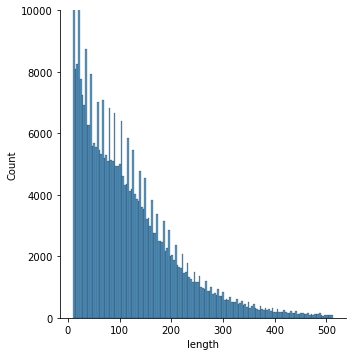

In [136]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.displot(total_data['length'])
plt.ylim([0,10000])
#plt.xlim([0,100])
plt.show()

# for debugging

In [1]:
from glob import glob
from tqdm import tqdm
import numpy as np
import json
import pandas as pd
import pickle


In [2]:
#paragraph_data_list = glob("./paragraph_labeling_1.0.0/*.xlsx")
paragraph_data_list = glob("./paragraph_labeling_2.0.0/*.csv")
test_num = 790
paragraph_data_list[test_num]

'./paragraph_labeling_2.0.0/11086.text_labeling_ki21131.csv'

In [3]:
#pd.read_excel(paragraph_data_list[test_num], engine='openpyxl')
codecs = ['cp949','utf-8','ascii','cp037','cp273','cp424','cp437','cp500','cp720','cp737','cp775','cp850','cp852','cp855',
          'cp856','cp857','cp858','cp860','cp861','cp862','cp863','cp864','cp865','cp866','cp869','cp874','cp875','cp932',
          'cp950','cp1006','cp1026','cp1125','cp1140','cp1250','cp1251','cp1252','cp1253','cp1254','cp1255','cp1256','cp1257','cp1258',
          'euc_jp','euc_jis_2004','euc_jisx0213','euc_kr','gb2312','gbk','gb18030','hz','iso2022_jp','iso2022_jp_1','iso2022_jp_2',
          'iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr','latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6',
          'iso8859_7','iso8859_8','iso8859_9','iso8859_10','iso8859_11','iso8859_13','iso8859_14','iso8859_15','iso8859_16','johab','koi8_r','koi8_t',
          'koi8_u','kz1048','mac_cyrillic','mac_greek','mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154','shift_jis','shift_jis_2004',
          'shift_jisx0213','utf_32','utf_32_be','utf_32_le','utf_16','utf_16_be','utf_16_le','utf_7','utf_8_sig']
for codec in codecs:
    try:
        data = pd.read_csv(paragraph_data_list[test_num], encoding=codec)
        print(codec)
        break
    except UnicodeDecodeError:
        continue
    except:
        print('file format error!')
        continue


cp949


In [43]:
pd.read_csv(paragraph_data_list[test_num], encoding='utf-8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9b in position 14: invalid start byte

In [30]:
data = pd.read_excel(paragraph_data_list[test_num], engine='openpyxl')

try:
    text_list=[]
    label_list=[]
    for meta in data.iterrows():
        meta = meta[1]
        
        ''' text data 추출 '''
        text = meta[1]
        if not pd.notnull(text):
            continue
        
        ''' label data 추출 '''
        label = meta[2]
        if not pd.notnull(label):
            continue
        label = label.replace("[","").replace("]","").split(",")
        if len(label)==6:
            label = [1 if i!="0" else 0 for i in label]
        else: 
            continue
        
        text_list.append(text)
        label_list.append(label)

    if len(text_list) == 0 or len(label_list) == 0:
        raise ValueError

except:
    text_list=[]
    label_list=[]
    
    ''' text, tag가 있는 index 확인 '''
    for n, c in enumerate(list(data.columns)):
        if c.find('tag') != -1 :
            tag_index=n
        elif c.find('paragraph') != -1:
            text_index=n
    
    for meta in data.iterrows():
        meta = meta[1]
        
        ''' text data 추출 '''
        text = meta[text_index]
        if not pd.notnull(text):
            continue
        
        ''' label data 추출 '''
        label = meta[tag_index]
        if not pd.notnull(label):
            continue
        label = label.replace("[","").replace("]","").split(",")
        if len(label)==6:
            label = [1 if i!="0" else 0 for i in label]
        else: 
            continue
            
        text_list.append(text)
        label_list.append(label)
        
    if len(text_list) == 0 or len(label_list) == 0:
        raise ValueError

KeyboardInterrupt: 

In [19]:
data = pd.read_csv(paragraph_data_list[test_num], encoding='utf-8')
data = data.dropna(thresh=2)
text_list=[]
label_list=[]

''' text, tag가 있는 index 확인 '''
for n, c in enumerate(list(data.columns)):
    if c.find('paragraph') != -1:
        text_index=n

for meta in data.iterrows():
    meta = meta[1]
    
    ''' text data 추출 '''
    text = meta[text_index]
    if not pd.notnull(text):
        continue
        
    ''' label data 추출 '''
    label = meta[text_index+1:text_index+7].to_list()
    for l in label:
        if not pd.notnull(l):
            check=False
            break
        else:
            check=True
    if not check:
        continue
    label = [int(i) for i in label]
    text_list.append(text)
    label_list.append(label)
    
if len(text_list) == 0 or len(label_list) == 0:
    raise Exception('data 길이가 0이거나 text labeling data')

Exception: data 길이가 0이거나 text labeling data

In [25]:
label

[0.0, 0.0, 0.0, 0.0, 1.0, nan]

In [21]:
text_list

[]